In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in latest_date:
    the_date = pd.to_datetime(date)
latest_date

('2017-08-23',)

In [11]:
date_year_ago = dt.date(the_date.year-1,the_date.month,the_date.day)
date_year_ago

datetime.date(2016, 8, 23)

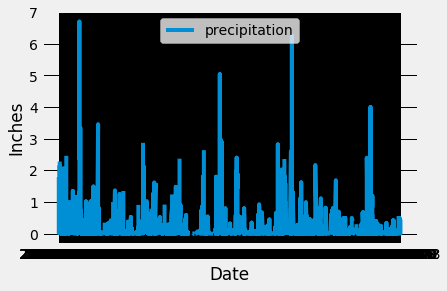

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_year_ago = dt.date(the_date.year-1,the_date.month,the_date.day)
one_year_data = session.query(Measurement.date,Measurement.prcp).\
            filter(Measurement.date >= date_year_ago).all()
one_year_data
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_prcp_df = pd.DataFrame(one_year_data)
last_year_prcp_df.rename(columns = {0:"Date", 1:"Precipitation (in)"},inplace=True)
# Sort the dataframe by date
last_year_prcp_df.sort_values(by="Date",ascending=True,inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(last_year_prcp_df["Date"],last_year_prcp_df["Precipitation (in)"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(['precipitation'], loc='upper center')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_prcp_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count('*').label('station')).group_by(Measurement.station).order_by(func.count('*').desc())
for row in active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station, func.count(Measurement.station).group_by(Measurement.station).order_by(Measurement.station).desc()).first()[0]
most_active_station_info = session.query(Measurement.station,Measurement.tobs).\
            filter(Measurement.station == most_active_station).all()
most_active_station_summary = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                group_by(Measurement.station).filter(Measurement.station == most_active_station)
for row in most_active_station_summary:
    print(row)


AttributeError: Neither 'count' object nor 'Comparator' object has an attribute 'group_by'

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
rain = session.query(Meaurement.date,Meaurement.tobs).\
        filter

# Close Session

In [ ]:
# Close Session
session.close()